# Problem Statement

Create a model that outputs expected rate levels or movements based on sentiment measurements from Fed statements, Fed press briefings, and other events with Fed speakers. Explore impacts on nominal yields, real yields, and yield curve spreads. If data is available, also explore the impacts on STIR markets (Eurodollar and Fed Funds futures).

#### Steps
- Generate scores from statements
- Compile all the relevant statements
- Graph measured sentiment scores over time to check if the nlp worked
- Maybe standardize rate levels based on their historical range of values
- Graph the change in rate level over time
- Determine relationship between sent score and change in rate level

#### Steps 2
- Create a function to generate one-day price movement after fed statements (problem might arise if market was not open the day after)


#### Import Statements

In [59]:
import nltk
import quandl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import requests as req
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression


nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
sia = SentimentIntensityAnalyzer()

#### Compiling Links to HTML files of all statements dating back to 2016

In [3]:

  
# Requesting for the website
Web = req.get('https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm')
  
# Creating a BeautifulSoup object and specifying the parser
s = BeautifulSoup(Web.text, 'lxml')

# Links to html files of all statements
links = ['https://www.federalreserve.gov' + tag['href'] for tag in s.find_all('a') if tag.text == 'HTML' 
                                           and tag['href'][:34] == '/newsevents/pressreleases/monetary']


#### Using links to put statements into strings

In [4]:
statements = {}
i=0
for link in links:
    print('Progress:', str(round(i/len(links)*100, 1)) + '%')
    i += 1
    date = link[-13:-5]
    Web = req.get(link)
    s = BeautifulSoup(Web.text, 'lxml')
    statements[date] = (' '.join([tag.text for tag in s.find('div', id='article').find_all('p', class_=None)][:-2]))
statements

Progress: 0.0%
Progress: 2.0%
Progress: 4.0%
Progress: 6.0%
Progress: 8.0%
Progress: 10.0%
Progress: 12.0%
Progress: 14.0%
Progress: 16.0%
Progress: 18.0%
Progress: 20.0%
Progress: 22.0%
Progress: 24.0%
Progress: 26.0%
Progress: 28.0%
Progress: 30.0%
Progress: 32.0%
Progress: 34.0%
Progress: 36.0%
Progress: 38.0%
Progress: 40.0%
Progress: 42.0%
Progress: 44.0%
Progress: 46.0%
Progress: 48.0%
Progress: 50.0%
Progress: 52.0%
Progress: 54.0%
Progress: 56.0%
Progress: 58.0%
Progress: 60.0%
Progress: 62.0%
Progress: 64.0%
Progress: 66.0%
Progress: 68.0%
Progress: 70.0%
Progress: 72.0%
Progress: 74.0%
Progress: 76.0%
Progress: 78.0%
Progress: 80.0%
Progress: 82.0%
Progress: 84.0%
Progress: 86.0%
Progress: 88.0%
Progress: 90.0%
Progress: 92.0%
Progress: 94.0%
Progress: 96.0%
Progress: 98.0%


{'20210127': "The Federal Reserve is committed to using its full range of tools to support the U.S. economy in this challenging time, thereby promoting its maximum employment and price stability goals. The COVID-19 pandemic is causing tremendous human and economic hardship across the United States and around the world. The pace of the recovery in economic activity and employment has moderated in recent months, with weakness concentrated in the sectors most adversely affected by the pandemic. Weaker demand and earlier declines in oil prices have been holding down consumer price inflation. Overall financial conditions remain accommodative, in part reflecting policy measures to support the economy and the flow of credit to U.S. households and businesses. The path of the economy will depend significantly on the course of the virus, including progress on vaccinations. The ongoing public health crisis continues to weigh on economic activity, employment, and inflation, and poses considerable 

#### Useful Function

In [5]:
def sent_score(statement):
    """
    Returns the SentimentIntensityAnalyzer sentiment score for the string that is passed in.
    """
    scores = sia.polarity_scores(statement)
    return scores['compound']

#### Histogram of all past scores

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  1.,  2.,  1., 42.]),
 array([-0.4588 , -0.31316, -0.16752, -0.02188,  0.12376,  0.2694 ,
         0.41504,  0.56068,  0.70632,  0.85196,  0.9976 ]),
 <BarContainer object of 10 artists>)

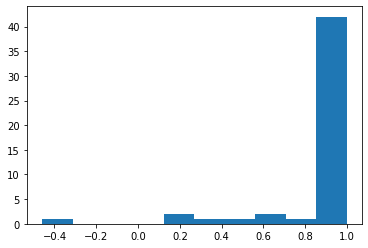

In [6]:
plt.hist(np.array([sent_score(statement) for statement in statements.values()]))

dict_keys(['20210127', '20210317', '20210428', '20210616', '20210728', '20210922', '20211103', '20200129', '20200303', '20200315', '20200323', '20200429', '20200610', '20200729', '20200916', '20201105', '20201216', '20190130', '20190320', '20190501', '20190619', '20190731', '20190918', '20191011', '20191030', '20191211', '20180131', '20180321', '20180502', '20180613', '20180801', '20180926', '20181108', '20181219', '20170201', '20170315', '20170503', '20170614', '20170726', '20170920', '20171101', '20171213', '20160127', '20160316', '20160427', '20160615', '20160727', '20160921', '20161102', '20161214'])

In [7]:
print('Sentiment Score of outlier:', sent_score(list(statements.values())[24]))
print('Date of outlier:', list(statements.keys())[24])

Sentiment Score of outlier: -0.4588
Date of outlier: 20191030


In [8]:
quandl.ApiConfig.api_key = '6YYqcHNouxRSb8q5_yLc'

<AxesSubplot:xlabel='Date'>

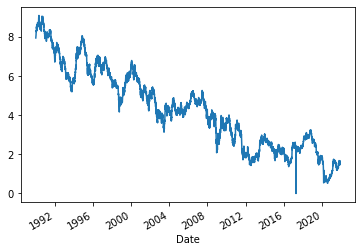

In [9]:
quandl.get("USTREASURY/YIELD", authtoken="6YYqcHNouxRSb8q5_yLc")['10 YR'].plot()

In [12]:
print(quandl.get("USTREASURY/YIELD", authtoken="6YYqcHNouxRSb8q5_yLc")['10 YR'])

Date
1990-01-02    7.94
1990-01-03    7.99
1990-01-04    7.98
1990-01-05    7.99
1990-01-08    8.02
              ... 
2021-11-22    1.63
2021-11-23    1.67
2021-11-24    1.64
2021-11-26    1.48
2021-11-29    1.52
Name: 10 YR, Length: 7985, dtype: float64


In [38]:
ten_year = quandl.get("USTREASURY/YIELD", authtoken="6YYqcHNouxRSb8q5_yLc")['10 YR']

def movement(date, prices=ten_year):
    dates = [price.strftime('%Y%m%d') for price in prices.index]
    if date in dates:
        index = dates.index(date)
        pre_date = dates[index-1]
        post_date = dates[index+1]
        return prices[post_date] - prices[pre_date]

In [39]:
movement('20210127')

0.020000000000000018

<AxesSubplot:xlabel='Sentiment Score', ylabel='Movement'>

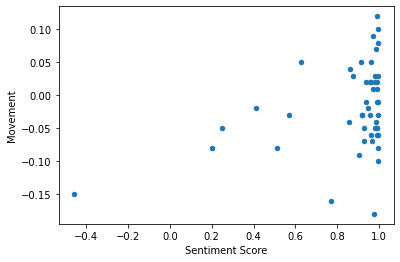

In [46]:
final_df = pd.DataFrame({'Date': list(statements.keys()),
              'Movement': [movement(day) for day in statements.keys()],
              'Sentiment Score': [sent_score(statement) for statement in statements.values()]})
final_df.plot.scatter('Sentiment Score', 'Movement')
plot.plot()